In [1]:
import imagej; ij = imagej.init('sc.fiji:fiji'); print(ij.getVersion())

[ERROR] Cannot create plugin: org.scijava.plugins.scripting.javascript.JavaScriptScriptLanguage


2.16.0/1.54g


In [2]:
from tqdm import tqdm
from scyjava import jimport
# Import Bio-Formats classes
BF = jimport('loci.plugins.BF')
ImporterOptions = jimport('loci.plugins.in.ImporterOptions')

# Configure Bio-Formats Importer Options
options = ImporterOptions()
options.setId('/orcd/data/edboyden/002/microscopy_data/targettrack_data/2025_01_08__swf702-YA-SodiumAzide-30fpv.nd2')



ND2Reader initializing /orcd/data/edboyden/002/microscopy_data/targettrack_data/2025_01_08__swf702-YA-SodiumAzide-30fpv.nd2
Searching for blocks
Parsing block 'ND2 FILE SIG' 0%
Parsing block 'ImageMetadat' 0%
Parsing block 'ImageCalibra' 0%
Parsing block 'ImageMetadat' 0%
Parsing block 'CustomDataVa' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDat

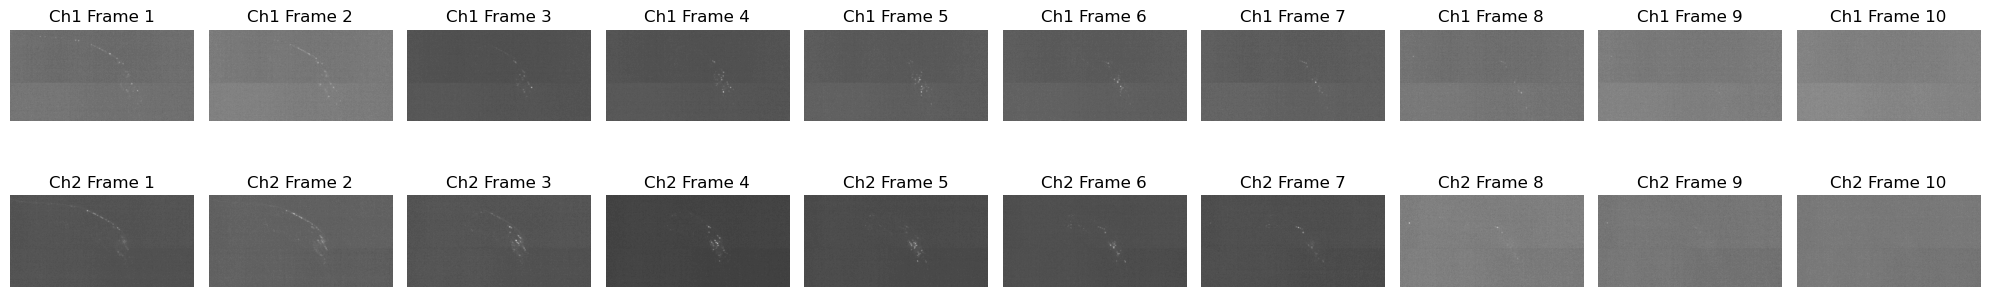

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scyjava import jimport

# Import additional Bio-Formats classes for lazy loading
ImageReader = jimport('loci.formats.ImageReader')
MetadataTools = jimport('loci.formats.MetadataTools')

try:
    # Initialize reader and metadata in correct order
    reader = ImageReader()
    omeMeta = MetadataTools.createOMEXMLMetadata()
    reader.setMetadataStore(omeMeta)  # Set metadata store first
    reader.setId(options.getId())      # Then set the file ID

    # Create a figure with a 10x2 grid
    plt.figure(figsize=(20, 4))

    # Iterate through the first 10 frames of each channel
    for i in range(10):
        # Channel 1
        plt.subplot(2, 10, i + 1)
        frame1 = reader.openBytes(i * 2)
        frame1_array = np.frombuffer(frame1, dtype=np.uint16).reshape(reader.getSizeY(), reader.getSizeX())
        plt.imshow(frame1_array, cmap='gray')
        plt.axis('off')
        plt.title(f'Ch1 Frame {i+1}')
        
        # Channel 2
        plt.subplot(2, 10, i + 11)
        frame2 = reader.openBytes(i * 2 + 1)
        frame2_array = np.frombuffer(frame2, dtype=np.uint16).reshape(reader.getSizeY(), reader.getSizeX())
        plt.imshow(frame2_array, cmap='gray')
        plt.axis('off')
        plt.title(f'Ch2 Frame {i+1}')

    plt.tight_layout()
    plt.show()

finally:
    # Make sure reader is always closed
    try:
        reader.close()
    except:
        pass

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scyjava import jimport

# Import Bio-Formats through ImageJ
BF = jimport('loci.plugins.BF')
ImporterOptions = jimport('loci.plugins.in.ImporterOptions')

# Configure and open the image
options = ImporterOptions()
options.setId('/orcd/data/edboyden/002/microscopy_data/targettrack_data/2025_01_08__swf702-YA-SodiumAzide-30fpv.nd2')
imps = BF.openImagePlus(options)

# Create a figure with a 10x2 grid
plt.figure(figsize=(20, 4))

# Iterate through the first 10 frames of each channel
for i in range(10):
    # Channel 1
    plt.subplot(2, 10, i + 1)
    frame1 = imps[0].getStack().getProcessor(i + 1).getFloatArray()
    plt.imshow(frame1, cmap='gray')
    plt.axis('off')
    plt.title(f'Ch1 Frame {i+1}')
    
    # Channel 2
    plt.subplot(2, 10, i + 11)
    frame2 = imps[1].getStack().getProcessor(i + 1).getFloatArray()
    plt.imshow(frame2, cmap='gray')
    plt.axis('off')
    plt.title(f'Ch2 Frame {i+1}')

plt.tight_layout()
plt.show()

TypeError: Class loci.plugins.BF is not found

In [3]:
# visualizes the first 10 frames from the first volume on each channel, in a 10 x 2 grid 

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Open the image using Bio-Formats
imps = BF.openImagePlus(options)

# Create a figure with a 10x2 grid
plt.figure(figsize=(20, 4))

# Iterate through the first 10 frames of each channel
for i in tqdm(range(10)):
    # Channel 1
    plt.subplot(2, 10, i + 1)
    frame1 = imps[0].getStack().getProcessor(i + 1).getFloatArray()
    plt.imshow(frame1, cmap='gray')
    plt.axis('off')
    plt.title(f'Ch1 Frame {i+1}')
    
    # Channel 2
    plt.subplot(2, 10, i + 11)
    frame2 = imps[1].getStack().getProcessor(i + 1).getFloatArray()
    plt.imshow(frame2, cmap='gray')
    plt.axis('off')
    plt.title(f'Ch2 Frame {i+1}')

plt.tight_layout()
plt.show()

Searching for blocks
Parsing block 'ND2 FILE SIG' 0%
Parsing block 'ImageMetadat' 0%
Parsing block 'ImageCalibra' 0%
Parsing block 'ImageMetadat' 0%
Parsing block 'CustomDataVa' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'ImageDataSeq' 0%
Parsing block 'Imag

In [4]:
# Install Required Libraries
# You can uncomment and run these lines if the libraries are not already installed.
# !pip install bioformats javabridge matplotlib tqdm

# Import necessary libraries
import bioformats
import javabridge
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter compatibility
import os

# Initialize the Java Virtual Machine (JVM) if it's not already running
if not javabridge.get_env() or not javabridge.get_env().is_vm_running():
    javabridge.start_vm(class_path=bioformats.JARS, max_heap_size="2G")

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Define the path to your image file
# Replace 'path_to_your_image_file.ome.tif' with the actual path to your image
image_path = '/orcd/data/edboyden/002/microscopy_data/targettrack_data/2025_01_08__swf702-YA-SodiumAzide-30fpv.nd2'

# Check if the file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The specified image file does not exist: {image_path}")

# Retrieve metadata without loading the entire image into memory
metadata = bioformats.get_omexml_metadata(image_path)
omexml = bioformats.OMEXML(metadata)

# Extract necessary metadata information
pixels = omexml.image(0).Pixels
size_c = pixels.SizeC
size_t = pixels.SizeT
size_z = pixels.SizeZ
size_x = pixels.SizeX
size_y = pixels.SizeY

# Determine the data type
dtype = bioformats.format_image_dtype(pixels)

# Number of channels and frames to visualize
num_channels = min(2, size_c)  # Visualize up to 2 channels
num_frames = min(10, size_t)   # Visualize up to 10 frames

# Create a figure with a grid: num_channels rows x num_frames columns
plt.figure(figsize=(num_frames * 2, num_channels * 2))

for c in range(1, num_channels + 1):
    for t in tqdm(range(1, num_frames + 1), desc=f'Channel {c}', leave=False):
        try:
            # Read the specific plane (z=0 assumed; adjust if necessary)
            plane = bioformats.read_image(
                image_path,
                series=0,
                z=0,          # Adjust if your data has multiple Z-slices
                c=c - 1,
                t=t - 1,
                rescale=False
            )
            
            # Normalize the image for better visualization if needed
            # Uncomment the following lines if your images require normalization
            # plane_min = plane.min()
            # plane_max = plane.max()
            # plane = (plane - plane_min) / (plane_max - plane_min)
            
            # Plot the frame
            plt.subplot(num_channels, num_frames, (c - 1) * num_frames + t)
            plt.imshow(plane, cmap='gray')
            plt.axis('off')
            plt.title(f'Ch{c} F{t}')
        
        except Exception as e:
            print(f"Error loading Channel {c}, Frame {t}: {e}")
            # Optionally, you can plot a placeholder or skip
            plt.subplot(num_channels, num_frames, (c - 1) * num_frames + t)
            plt.axis('off')
            plt.title(f'Ch{c} F{t}\nError')

plt.tight_layout()
plt.show()

# Shutdown the JVM if you are done with all Bio-Formats operations
# WARNING: Once the JVM is killed, you cannot restart it within the same Python process
# Uncomment the following line if you are certain you won't need Bio-Formats anymore
# javabridge.kill_vm()

AttributeError: type object '_javabridge.JB_Object' has no attribute '__reduce_cython__'